<a href="https://colab.research.google.com/github/PabloAndree/Python_PA/blob/main/%5BStudentView%5D_Lab4_Otras_te%CC%81cnicas_de_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 4: Otras técnicas de Data Wrangling**

El objetivo de este laboratorio es presentar diferentes técnicas de Data Wrangling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

El dataset `Airdata.csv` contiene un conjunto de datos de calidad del aire que comprende grabaciones por hora del año 2020 desde tres ubicaciones (A,B,C).

In [2]:
air_df = pd.read_csv("/content/Airdata.csv")
air_df.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
0,1/1/2020 0:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37
1,1/1/2020 1:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53
2,1/1/2020 2:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80
3,1/1/2020 3:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80
4,1/1/2020 4:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43


In [3]:
air_df.tail()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C
8779,12/31/2020 19:00,4.920528,72,4.553680,251.56506,53.44,32.65,66.82
8780,12/31/2020 20:00,4.990529,74,3.259939,186.34020,49.80,34.03,67.31
8781,12/31/2020 21:00,4.360529,84,10.587917,252.18112,43.32,25.55,59.33
8782,12/31/2020 22:00,3.820528,88,8.435069,219.80557,39.88,19.90,43.70
8783,12/31/2020 23:00,3.170529,89,6.792466,212.00539,39.04,30.33,46.87


### **Paso 0:** Data Cleaning

El atributo `DateTime` puede ser limpiado para enriquecer la data (a nivel II) de tal manera que tengamos `Month`, `Day`, `Hour` y `Weekday` para realizar un mejor análisis

**TO DO:** realice Data Cleaning a nivel II

In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DateTime        8784 non-null   object 
 1   Temperature     8784 non-null   float64
 2   Humidity        8784 non-null   int64  
 3   Wind_Speed      8784 non-null   float64
 4   Wind_Direction  8784 non-null   float64
 5   NO2_Location_A  8664 non-null   float64
 6   NO2_Location_B  8204 non-null   float64
 7   NO2_Location_C  8652 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 549.1+ KB


In [5]:
air_df.DateTime = pd.to_datetime(air_df['DateTime'])

air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        8784 non-null   datetime64[ns]
 1   Temperature     8784 non-null   float64       
 2   Humidity        8784 non-null   int64         
 3   Wind_Speed      8784 non-null   float64       
 4   Wind_Direction  8784 non-null   float64       
 5   NO2_Location_A  8664 non-null   float64       
 6   NO2_Location_B  8204 non-null   float64       
 7   NO2_Location_C  8652 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 549.1 KB


In [6]:
#obtenemos los meses, días y horas
air_df["Month"] = air_df["DateTime"].dt.month
air_df["Day"] = air_df["DateTime"].dt.day
air_df["Hour"] = air_df["DateTime"].dt.hour
air_df["Weekday"] = air_df["DateTime"].dt.day_name()

air_df.head()

,DateTime,Temperature,Humidity,Wind_Speed,Wind_Direction,NO2_Location_A,NO2_Location_B,NO2_Location_C,Month,Day,Hour,Weekday
0,2020-01-01 00:00:00,2.180529,87,1.484318,75.963760,39.23,52.88,62.37,1,1,0,Wednesday
1,2020-01-01 01:00:00,1.490529,89,2.741678,113.198590,38.30,44.95,52.53,1,1,1,Wednesday
2,2020-01-01 02:00:00,1.690529,85,3.563818,135.000000,NaN,48.40,54.80,1,1,2,Wednesday
3,2020-01-01 03:00:00,1.430529,84,2.811690,129.805570,37.28,47.18,50.80,1,1,3,Wednesday
4,2020-01-01 04:00:00,0.840529,86,1.800000,126.869896,29.97,41.48,54.43,1,1,4,Wednesday


## I. **Valores Faltantes (*Missing Values*)**

###**Detección de valores faltantes**

#### **Primer Método:** Explora el dataset a partir de la función `info()`

In [7]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        8784 non-null   datetime64[ns]
 1   Temperature     8784 non-null   float64       
 2   Humidity        8784 non-null   int64         
 3   Wind_Speed      8784 non-null   float64       
 4   Wind_Direction  8784 non-null   float64       
 5   NO2_Location_A  8664 non-null   float64       
 6   NO2_Location_B  8204 non-null   float64       
 7   NO2_Location_C  8652 non-null   float64       
 8   Month           8784 non-null   int32         
 9   Day             8784 non-null   int32         
 10  Hour            8784 non-null   int32         
 11  Weekday         8784 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(1)
memory usage: 720.7+ KB


#### **Segundo Método:** Desarrollando una función en base a `isna()`

In [8]:
print('--Número de valores faltantes--')
for col in air_df.columns:
    n = sum(air_df[col].isna())
    print('{}:{}'.format(col,n))

--Número de valores faltantes--
DateTime:0
Temperature:0
Humidity:0
Wind_Speed:0
Wind_Direction:0
NO2_Location_A:120
NO2_Location_B:580
NO2_Location_C:132
Month:0
Day:0
Hour:0
Weekday:0


### **Diagnóstico de valores faltantes**

Existen dos métodos para diagnosticar los datos faltantes son: **visual** o estadística.

**Ejercicio:** Realizaremos el método visual para diagnosticar los datos faltantes para el atributo categórico **Weekday** de **NO2_LocationC**. Es decir una gráfica incluyendo los datos faltantes y otras sin valores faltantes.

In [15]:
#Detectar que datos son faltantes
isMV = air_df['NO2_Location_C'].isna()

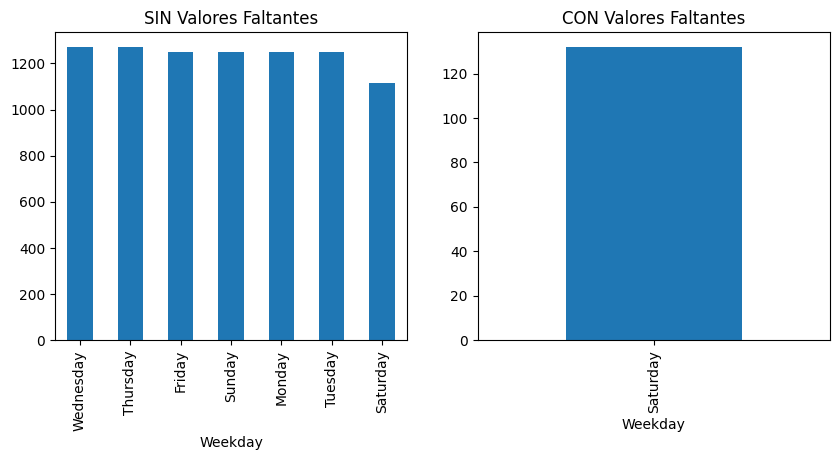

In [16]:
# Creo la visualización
#Visualización

labels = ["SIN Valores Faltantes", "CON Valores Faltantes"]

plt.figure(figsize=(10,4))

for i,poss in enumerate(isMV.unique()):

    plt.subplot(1,2,i+1)
    BM = isMV == poss
    air_df[BM].Weekday.value_counts().plot.bar()
    plt.title(labels[i])

plt.show()

**Ejercicio:** Implementa una función `diagnosticoMV_categorico()` para diagnosticar un atributo de tipo categórico.

In [17]:
def diagnosticoMV_categorico(df, atributo, isMV):

  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}
  plt.figure(figsize=(10,4))

  for i,poss in enumerate(isMV.unique()):
    plt.subplot(1,2,i+1)
    BM = isMV == poss

    df[BM][atributo].value_counts().plot.bar()
    plt.title(labelsDic[i])
  plt.show()

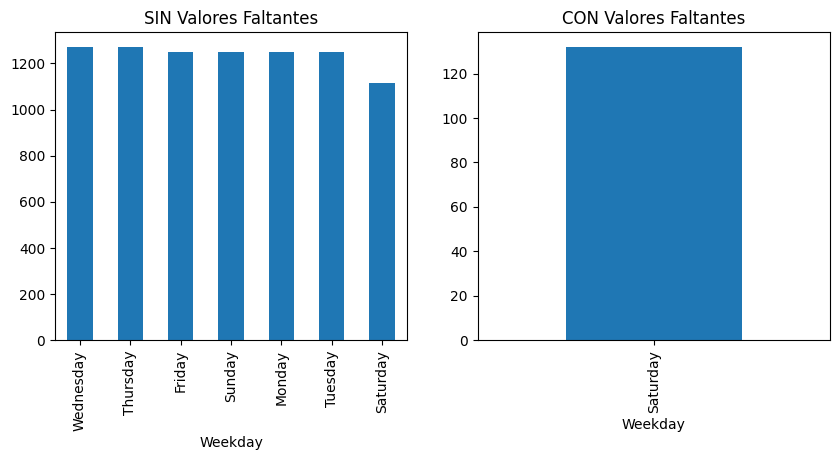

In [18]:
diagnosticoMV_categorico(air_df, "Weekday", isMV)

**Ejercicio:** Realiza el diagnóstico para todas los atributos categóricos (nominales) del dataset en base a **N02_Location_C**



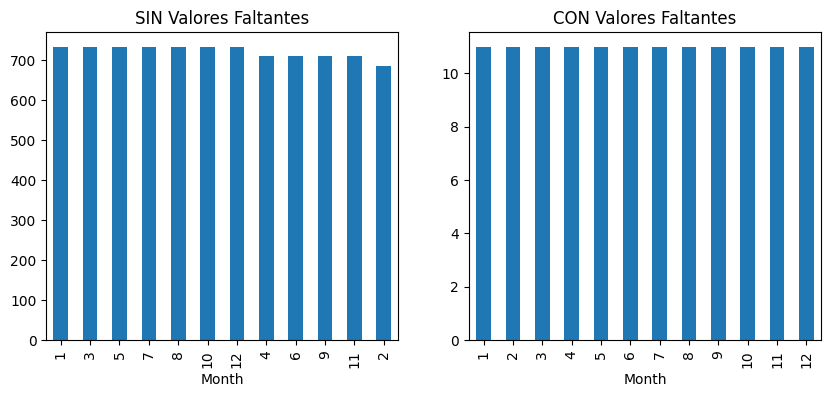

In [19]:
diagnosticoMV_categorico(air_df, "Month", isMV)

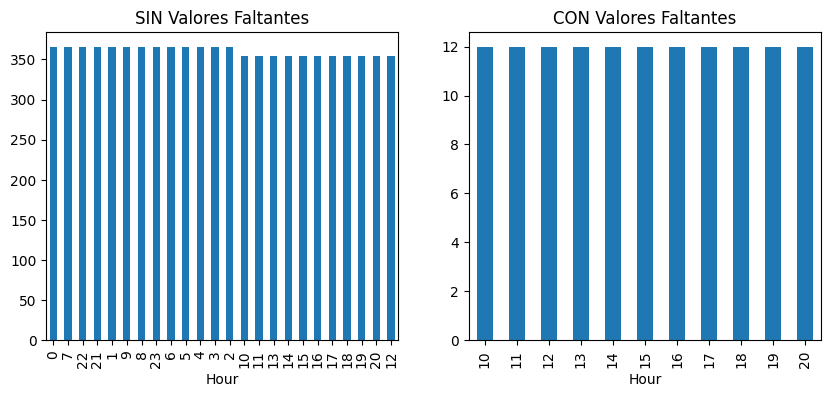

In [20]:
diagnosticoMV_categorico(air_df, "Hour", isMV)

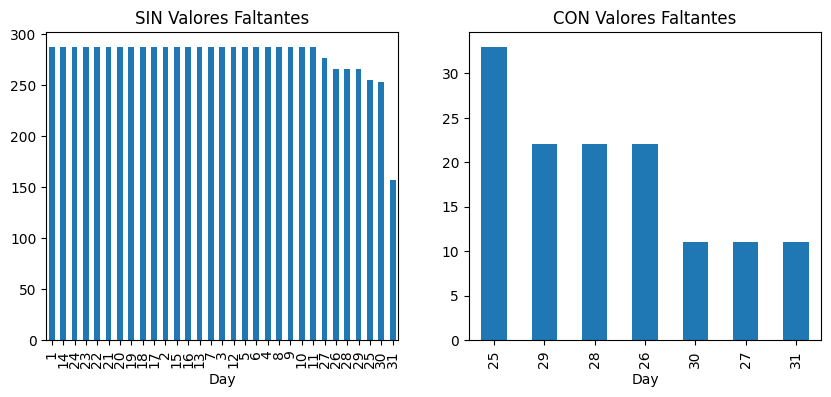

In [21]:
diagnosticoMV_categorico(air_df, "Day", isMV)

**Rpta:** Al observar vemos que los datos faltantes solo aparecen el día **Saturday**. Y si observamos los atributos `hour` y `day` también podemos observar patrones.
En conclusión, podemos deducir que los valores faltantes  ocurren el último Saturday de cada mes de 10:00 a 8:00 PM. Por lo tanto los datos son manipulados.

### **Tratamiento de valores faltantes**

Hay **cuatro enfoques diferentes** para tratar con valores faltantes:

1.   Guardarlos como están.
2.   Eliminar las filas con valores faltantes.
3.   Eliminar los atributos (columnas) con valores faltantes.
4.   Estimar e imputar un valor.

Cada una de las estrategias anteriores podría ser la mejor estrategia en diferentes circunstancias. De todos modos, cuando se trata de valores faltantes, tenemos los siguientes dos objetivos:

*   Mantener tantos datos e información como sea posible
*   Introducir la menor cantidad posible de sesgo en nuestro análisis